In [0]:
import os
import cv2
import time
import numpy as np
import tensorflow as tf

In [0]:
ls

flickr30k_blured/  flickr30k-images.tar  results_20130124.token  run_model/
flickr30k-images/  flickr30k_squared/    run_log/                sample_data/


In [0]:
"""from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))"""

'from google.colab import files\n\nuploaded = files.upload()\n\nfor fn in uploaded.keys():\n  print(\'User uploaded file "{name}" with length {length} bytes\'.format(\n      name=fn, length=len(uploaded[fn])))'

In [0]:
"""from urllib.request import urlretrieve
import os

def download(url, file):
    if not os.path.isfile(file):
        print("Download file... " + file + " ...")
        urlretrieve(url,file)
        print("File downloaded")

download('http://shannon.cs.illinois.edu/DenotationGraph/data/flickr30k-images.tar','flickr30k-images.tar')
print("All the files are downloaded")"""

'from urllib.request import urlretrieve\nimport os\n\ndef download(url, file):\n    if not os.path.isfile(file):\n        print("Download file... " + file + " ...")\n        urlretrieve(url,file)\n        print("File downloaded")\n\ndownload(\'http://shannon.cs.illinois.edu/DenotationGraph/data/flickr30k-images.tar\',\'flickr30k-images.tar\')\nprint("All the files are downloaded")'

In [0]:
"""import tarfile
tar = tarfile.open('flickr30k-images.tar')
tar.extractall()
tar.close()"""

"import tarfile\ntar = tarfile.open('flickr30k-images.tar')\ntar.extractall()\ntar.close()"

In [0]:
"""!pip install opencv-python"""

'!pip install opencv-python'

In [0]:
#Pour choisir le fichier  results_20130124.token
"""from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))"""

'from google.colab import files\n\nuploaded = files.upload()\n\nfor fn in uploaded.keys():\n  print(\'User uploaded file "{name}" with length {length} bytes\'.format(\n      name=fn, length=len(uploaded[fn])))'

In [0]:
"""import os
import sys
import tensorflow as tf
from tensorflow import gfile
from tensorflow import logging
import pprint
import pickle
import numpy as np
import cv2


input_description_file = "results_20130124.token"
input_img_dir = "flickr30k-images/"
output_img_dir = "flickr30k_squared/"

if not os.path.exists(output_img_dir):
    os.mkdir(output_img_dir)


def parse_token_file(token_file):# analyser le fichier dans un dictionnaire
    #Parses token file.
    img_name_to_tokens = {}
    with gfile.GFile(token_file, 'r') as f:
        lines = f.readlines()
    for line in lines:
        img_id, description = line.strip('\r\n').split('\t')#Fichier d'analyse
        #1000092795.jpg#0    Two young guys with shaggy hair look at their hands...
        img_name, _ = img_id.split('#')#Supprimer le nom du fichier
        img_name_to_tokens.setdefault(img_name, [])
        img_name_to_tokens[img_name].append(description)#Renvoie toutes les descriptions sur une image
    return img_name_to_tokens

img_name_to_tokens = parse_token_file(input_description_file)
all_img_names = list(img_name_to_tokens.keys())#Le nom du fichier est all_img_names all keys


index = 0
for img_name in all_img_names:
    input_img_path = os.path.join(input_img_dir,str(img_name))
    print(index)
    img = cv2.imread(input_img_path,1)
    height = img.shape[0]
    width = img.shape[1]
    if height>=256 and width>=256:
        dstImg = img[int( (height-256)/2 ):int(height-(height-256)/2),int( (width-256)/2 ):int(width-(width-256)/2 )]
        out_put_path = os.path.join(output_img_dir,  "%d.jpg" % index)
        cv2.imwrite(out_put_path,dstImg)
        index +=1"""

'import os\nimport sys\nimport tensorflow as tf\nfrom tensorflow import gfile\nfrom tensorflow import logging\nimport pprint\nimport pickle\nimport numpy as np\nimport cv2\n\n\ninput_description_file = "results_20130124.token"\ninput_img_dir = "flickr30k-images/"\noutput_img_dir = "flickr30k_squared/"\n\nif not os.path.exists(output_img_dir):\n    os.mkdir(output_img_dir)\n\n\ndef parse_token_file(token_file):# analyser le fichier dans un dictionnaire\n    #Parses token file.\n    img_name_to_tokens = {}\n    with gfile.GFile(token_file, \'r\') as f:\n        lines = f.readlines()\n    for line in lines:\n        img_id, description = line.strip(\'\r\n\').split(\'\t\')#Fichier d\'analyse\n        #1000092795.jpg#0    Two young guys with shaggy hair look at their hands...\n        img_name, _ = img_id.split(\'#\')#Supprimer le nom du fichier\n        img_name_to_tokens.setdefault(img_name, [])\n        img_name_to_tokens[img_name].append(description)#Renvoie toutes les descriptions sur 

In [0]:
"""import os
import cv2


input_img_dir = "flickr30k_squared/"
output_img_dir = "flickr30k_blured/"

if not os.path.exists(output_img_dir):
    os.mkdir(output_img_dir)


for i in range(31461):
    input_img_path = os.path.join(input_img_dir,"%d.jpg" % i)
    img = cv2.imread(input_img_path,1)
    out_put_path = os.path.join(output_img_dir, "%d.jpg" % i)
    
    if i>=0 and i<3000:
        img = cv2.GaussianBlur(img,(3,3),1)
    if i>=3000 and i<6000:
        img = cv2.GaussianBlur(img,(3,3),1.5)
    if i>=6000 and i<9000:
        img = cv2.GaussianBlur(img,(3,3),2)
    if i>=9000 and i<12000:
        img = cv2.GaussianBlur(img,(3,3),2.5)
    if i>=12000 and i<15000:
        img = cv2.GaussianBlur(img,(3,3),3)
    if i>=15000 and i<18000:
        img = cv2.GaussianBlur(img,(3,3),3.5)
    if i>=18000 and i<21000:
        img = cv2.GaussianBlur(img,(5,5),1)
    if i>=21000 and i<24000:
        img = cv2.GaussianBlur(img,(5,5),1.5)
    if i>=24000 and i<27000:
        img = cv2.GaussianBlur(img,(5,5),2)        
    if i>=27000 and i<30000:
        img = cv2.GaussianBlur(img,(7,7),1)
    if i>=30000:
        img = img
    cv2.imwrite(out_put_path,img)"""

'import os\nimport cv2\n\n\ninput_img_dir = "flickr30k_squared/"\noutput_img_dir = "flickr30k_blured/"\n\nif not os.path.exists(output_img_dir):\n    os.mkdir(output_img_dir)\n\n\nfor i in range(31461):\n    input_img_path = os.path.join(input_img_dir,"%d.jpg" % i)\n    img = cv2.imread(input_img_path,1)\n    out_put_path = os.path.join(output_img_dir, "%d.jpg" % i)\n    \n    if i>=0 and i<3000:\n        img = cv2.GaussianBlur(img,(3,3),1)\n    if i>=3000 and i<6000:\n        img = cv2.GaussianBlur(img,(3,3),1.5)\n    if i>=6000 and i<9000:\n        img = cv2.GaussianBlur(img,(3,3),2)\n    if i>=9000 and i<12000:\n        img = cv2.GaussianBlur(img,(3,3),2.5)\n    if i>=12000 and i<15000:\n        img = cv2.GaussianBlur(img,(3,3),3)\n    if i>=15000 and i<18000:\n        img = cv2.GaussianBlur(img,(3,3),3.5)\n    if i>=18000 and i<21000:\n        img = cv2.GaussianBlur(img,(5,5),1)\n    if i>=21000 and i<24000:\n        img = cv2.GaussianBlur(img,(5,5),1.5)\n    if i>=24000 and i<2700

In [0]:
import time
import numpy as np
import tensorflow as tf

In [0]:
class Image_set:
    def __init__(self):
        self.num_data = 31461
        self.squared_img_path = "flickr30k_squared/"
        self.blured_img_path = "flickr30k_blured/"
        self.indicator = 0
        self.index = [i for i in range(31461)]
        self.index = np.random.permutation(self.index)
        
    def next_batch(self,batch_size):
            
        end_indicator = self.indicator + batch_size
        if end_indicator >= self.num_data:
            self.index = np.random.permutation(self.index)
            self.indicator = 0
            end_indicator = self.indicator + batch_size
        assert end_indicator < self.num_data
        
        
        batch_img_index = self.index[self.indicator: end_indicator]
        batch_squared_img = []
        batch_blured_img = []
        
        for img_index in batch_img_index:
            squared_img_path = os.path.join(self.squared_img_path,"%d.jpg" % img_index)
            blured_img_path = os.path.join(self.blured_img_path,"%d.jpg" % img_index)
            
            squared_img = np.array(cv2.imread(squared_img_path,1),dtype = np.float32)
            blured_img = np.array(cv2.imread(blured_img_path,1),dtype = np.float32)
            squared_img = (squared_img-127.5)/127.5
            blured_img = (blured_img-127.5)/127.5
            
            batch_squared_img.append(squared_img)
            batch_blured_img.append(blured_img)
        
        self.indicator = end_indicator
        
        if batch_size ==1:#用于测试
            #os.chdir('/content')os.chdir(model_dir)
            batch_squared_img = []
            batch_blured_img = []
            squared_img_path = os.path.join(self.squared_img_path,"%d.jpg" % 26693)
            blured_img_path = os.path.join(self.blured_img_path,"%d.jpg" % 26693)
            squared_img = np.array(cv2.imread(squared_img_path,1),dtype = np.float32)
            blured_img = np.array(cv2.imread(blured_img_path,1),dtype = np.float32)
            squared_img = (squared_img-127.5)/127.5
            blured_img = (blured_img-127.5)/127.5
            batch_squared_img.append(squared_img)
            batch_blured_img.append(blured_img)
        return batch_squared_img,batch_blured_img



In [0]:
x_image = tf.placeholder(tf.float32,[None,256,256,3])
y_image = tf.placeholder(tf.float32,[None,256,256,3])    

conv1_1 = tf.layers.conv2d(x_image,64,(3,3),padding='same',activation=None,name='conv1_1')#256*256*3 -> 256*256*64
conv1_2 = tf.layers.conv2d(conv1_1,64,(3,3),padding='same',activation=None,name='conv1_2')
bn1 = tf.nn.tanh(tf.layers.batch_normalization(conv1_2))
pooling1 = tf.layers.max_pooling2d(bn1,(2,2),(2,2),name = 'pool1') #256*256*64 -> 128*128*64

conv2_1 = tf.layers.conv2d(pooling1,128,(3,3),padding='same',activation=None,name='conv2_1')#128*128*64 -> 128*128*128
conv2_2 = tf.layers.conv2d(conv2_1,128,(3,3),padding='same',activation=None,name='conv2_2')
bn2 = tf.nn.tanh(tf.layers.batch_normalization(conv2_2))
pooling2 = tf.layers.max_pooling2d(bn2,(2,2),(2,2),name = 'pool2')#128*128*128 ->64*64*128

conv3_1 = tf.layers.conv2d(pooling2,256,(3,3),padding='same',activation=None,name='conv3_1')#64*64*128 -> 64*64*256
conv3_2 = tf.layers.conv2d(conv3_1,256,(3,3),padding='same',activation=None,name='conv3_2')
bn3 = tf.nn.tanh(tf.layers.batch_normalization(conv3_2))
pooling3 = tf.layers.max_pooling2d(bn3,(2,2),(2,2),name = 'pool3')#64*64*256 -> 32*32*256

conv4_1 = tf.layers.conv2d(pooling3,512,(3,3),padding='same',activation=None,name='conv4_1')#32*32*256 -> 32*32*512
conv4_2 = tf.layers.conv2d(conv4_1,512,(3,3),padding='same',activation=None,name='conv4_2')
bn4 = tf.nn.relu(tf.layers.batch_normalization(conv4_2))
pooling4 = tf.layers.max_pooling2d(bn4,(2,2),(2,2),name = 'pool4')#32*32*512 -> 16*16*512

conv5_1 = tf.layers.conv2d(pooling4,512,(3,3),padding='same',activation=None,name='conv5_1')#16*16*512 -> 16*16*512
conv5_2 = tf.layers.conv2d(conv5_1,512,(3,3),padding='same',activation=None,name='conv5_2')
bn5 = tf.nn.tanh(tf.layers.batch_normalization(conv5_2))
pooling5 = tf.layers.max_pooling2d(bn5,(2,2),(2,2),name = 'pool5')#16*16*512 -> 8*8*512

conv6_1 = tf.layers.conv2d(pooling5,512,(3,3),padding='same',activation=None,name='conv6_1')#8*8*512 -> 8*8*512
conv6_2 = tf.layers.conv2d(conv6_1,512,(3,3),padding='same',activation=None,name='conv6_2')
bn6 = tf.nn.tanh(tf.layers.batch_normalization(conv6_2))
pooling6 = tf.layers.max_pooling2d(bn6,(2,2),(2,2),name = 'pool6')#8*8*512 -> 4*4*512

conv7_1 = tf.layers.conv2d(pooling6,512,(3,3),padding='same',activation=None,name='conv7_1')#4*4*512 -> 4*4*512
conv7_2 = tf.layers.conv2d(conv7_1,512,(3,3),padding='same',activation=None,name='conv7_2')
bn7 = tf.nn.tanh(tf.layers.batch_normalization(conv7_2))
pooling7 = tf.layers.max_pooling2d(bn7,(2,2),(2,2),name = 'pool7')#4*4*512 -> 2*2*512

conv8_1 = tf.layers.conv2d(pooling7,512,(3,3),padding='same',activation=None,name='conv8_1')#2*2*512 -> 2*2*512
conv8_2 = tf.layers.conv2d(conv8_1,512,(3,3),padding='same',activation=None,name='conv8_2')
bn8 = tf.nn.tanh(tf.layers.batch_normalization(conv8_2))
pooling8 = tf.layers.max_pooling2d(bn8,(2,2),(2,2),name = 'pool8')#2*2*512 -> 1*1*512

conv1_transpose = tf.layers.conv2d_transpose(pooling8, 512,[3,3],strides=(2,2),padding='SAME')#1*1*512 -> 2*2*512
conv1_transpose_res = conv1_transpose + bn8
conv1_tr_1 = tf.layers.conv2d(conv1_transpose_res,512,(3,3),padding='same',activation=None,name='conv1_tr_1')
conv1_tr_2 = tf.layers.conv2d(conv1_tr_1,512,(3,3),padding='same',activation=None,name='conv1_tr_2')
bn1_transpose = tf.nn.tanh(tf.layers.batch_normalization(conv1_tr_2))

conv2_transpose = tf.layers.conv2d_transpose(bn1_transpose, 512,[3,3],strides=(2,2),padding='SAME')#2*2*512 -> 4*4*512
conv2_transpose_res = conv2_transpose + bn7
conv2_tr_1 = tf.layers.conv2d(conv2_transpose_res,512,(3,3),padding='same',activation=None,name='conv2_tr_1')
conv2_tr_2 = tf.layers.conv2d(conv2_tr_1,512,(3,3),padding='same',activation=None,name='conv2_tr_2')
bn2_transpose = tf.nn.tanh(tf.layers.batch_normalization(conv2_tr_2))

conv3_transpose = tf.layers.conv2d_transpose(bn2_transpose, 512,[3,3],strides=(2,2),padding='SAME')#4*4*512 -> 8*8*512
conv3_transpose_res = conv3_transpose + bn6
conv3_tr_1 = tf.layers.conv2d(conv3_transpose_res,512,(3,3),padding='same',activation=None,name='conv3_tr_1')
conv3_tr_2 = tf.layers.conv2d(conv3_tr_1,512,(3,3),padding='same',activation=None,name='conv3_tr_2')
bn3_transpose = tf.nn.tanh(tf.layers.batch_normalization(conv3_tr_2))

conv4_transpose = tf.layers.conv2d_transpose(bn3_transpose, 512,[3,3],strides=(2,2),padding='SAME')#8*8*512 -> 16*16*512
conv4_transpose_res = conv4_transpose + bn5
conv4_tr_1 = tf.layers.conv2d(conv4_transpose_res,512,(3,3),padding='same',activation=None,name='conv4_tr_1')
conv4_tr_2 = tf.layers.conv2d(conv4_tr_1,512,(3,3),padding='same',activation=None,name='conv4_tr_2')
bn4_transpose = tf.nn.tanh(tf.layers.batch_normalization(conv4_tr_2))

conv5_transpose = tf.layers.conv2d_transpose(bn4_transpose, 512,[3,3],strides=(2,2),padding='SAME')#16*16*512->32*32*256
conv5_transpose_res = conv5_transpose + bn4
conv5_tr_1 = tf.layers.conv2d(conv5_transpose_res,256,(3,3),padding='same',activation=None,name='conv5_tr_1')
conv5_tr_2 = tf.layers.conv2d(conv5_tr_1,256,(3,3),padding='same',activation=None,name='conv5_tr_2')
bn5_transpose = tf.nn.tanh(tf.layers.batch_normalization(conv5_tr_2))

conv6_transpose = tf.layers.conv2d_transpose(bn5_transpose, 256,[3,3],strides=(2,2),padding='SAME')#32*32*256->64*64*128
conv6_transpose_res = conv6_transpose + bn3
conv6_tr_1 = tf.layers.conv2d(conv6_transpose_res,128,(3,3),padding='same',activation=None,name='conv6_tr_1')
conv6_tr_2 = tf.layers.conv2d(conv6_tr_1,128,(3,3),padding='same',activation=None,name='conv6_tr_2')
bn6_transpose = tf.nn.tanh(tf.layers.batch_normalization(conv6_tr_2))

conv7_transpose = tf.layers.conv2d_transpose(bn6_transpose, 128,[3,3],strides=(2,2),padding='SAME')#64*64*128->128*128*64
conv7_transpose_res = conv7_transpose + bn2
conv7_tr_1 = tf.layers.conv2d(conv7_transpose_res,64,(3,3),padding='same',activation=None,name='conv7_tr_1')
conv7_tr_2 = tf.layers.conv2d(conv7_tr_1,64,(3,3),padding='same',activation=None,name='conv7_tr_2')
bn7_transpose = tf.nn.tanh(tf.layers.batch_normalization(conv7_tr_2))

conv8_transpose = tf.nn.tanh(tf.layers.conv2d_transpose(bn7_transpose, 64,[3,3],strides=(2,2),padding='SAME'))#128*128*64->256*256*64
conv8_transpose_res = conv8_transpose + bn1
conv8_tr_1 = tf.layers.conv2d(conv8_transpose_res,64,(3,3),padding='same',activation=None,name='conv8_tr_1')
conv8_tr_2 = tf.layers.conv2d(conv8_tr_1,64,(3,3),padding='same',activation=None,name='conv8_tr_2')
conv8_tr_special11 = tf.layers.conv2d(conv8_tr_2, 3,(1,1),padding='same',activation=None,name='y_image_predict')#256*256*64->256*256*3
y_image_predict = tf.nn.tanh(tf.layers.batch_normalization(conv8_tr_special11))

loss = tf.reduce_mean(tf.square(y_image-y_image_predict))
tf.summary.scalar('loss',loss)
global_step = tf.Variable(0,trainable=False)#训练的次数

Instructions for updating:
Use keras.layers.conv2d instead.
Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use keras.layers.batch_normalization instead.
Instructions for updating:
Use keras.layers.max_pooling2d instead.
Instructions for updating:
Use keras.layers.conv2d_transpose instead.


Instructions for updating:
Use standard file APIs to check for files with this prefix.
INFO:tensorflow:Restoring parameters from run_model/ckp-001200


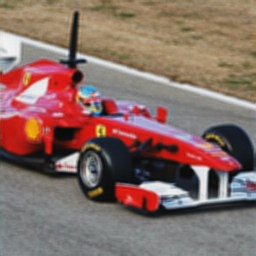

global_step= 1201  losses= 0.012202594  time=17.822127s
global_step= 1202  losses= 0.25423765  time=2.878852s
global_step= 1203  losses= 0.10275341  time=2.882050s
global_step= 1204  losses= 0.06559976  time=2.855680s
global_step= 1205  losses= 0.04110606  time=2.848797s
global_step= 1206  losses= 0.028367108  time=2.870847s
global_step= 1207  losses= 0.03783929  time=2.883658s
global_step= 1208  losses= 0.03230838  time=2.870541s
global_step= 1209  losses= 0.029962385  time=2.873809s
global_step= 1210  losses= 0.026323026  time=2.846069s
global_step= 1211  losses= 0.020873984  time=2.868420s
global_step= 1212  losses= 0.031699024  time=2.838565s
global_step= 1213  losses= 0.021608949  time=2.843347s
global_step= 1214  losses= 0.020160137  time=2.865218s
global_step= 1215  losses= 0.023247272  time=2.843579s
global_step= 1216  losses= 0.026026146  time=2.833649s
global_step= 1217  losses= 0.022234388  time=2.860384s
global_step= 1218  losses= 0.024017291  time=2.864928s
global_step= 12

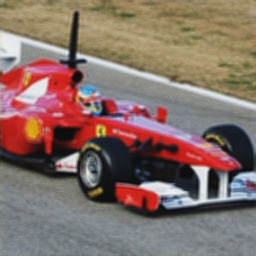

global_step= 1301  losses= 0.010235646  time=2.903766s
global_step= 1302  losses= 0.015677737  time=2.889560s
global_step= 1303  losses= 0.016977979  time=2.881155s
global_step= 1304  losses= 0.009947299  time=2.863179s
global_step= 1305  losses= 0.014662837  time=2.872070s
global_step= 1306  losses= 0.010776956  time=2.878400s
global_step= 1307  losses= 0.017848827  time=2.854783s
global_step= 1308  losses= 0.013389622  time=2.867971s
global_step= 1309  losses= 0.016513206  time=2.882231s
global_step= 1310  losses= 0.012117122  time=2.894775s
global_step= 1311  losses= 0.013003676  time=2.866364s
global_step= 1312  losses= 0.011363916  time=2.859137s
global_step= 1313  losses= 0.012120146  time=2.867494s
global_step= 1314  losses= 0.016923303  time=2.869271s
global_step= 1315  losses= 0.01738411  time=2.864033s
global_step= 1316  losses= 0.014799677  time=2.862887s
global_step= 1317  losses= 0.011261706  time=2.868909s
global_step= 1318  losses= 0.011229646  time=2.891918s
global_step

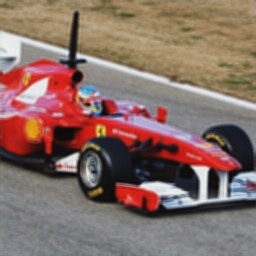

global_step= 1401  losses= 0.01167604  time=2.881163s
global_step= 1402  losses= 0.011368523  time=2.856486s
global_step= 1403  losses= 0.01210164  time=2.870263s
global_step= 1404  losses= 0.0129381865  time=2.848526s
global_step= 1405  losses= 0.014070228  time=2.852144s
global_step= 1406  losses= 0.011249821  time=2.848138s
global_step= 1407  losses= 0.016524816  time=2.865485s
global_step= 1408  losses= 0.012522154  time=2.853722s
global_step= 1409  losses= 0.015072911  time=2.853650s
global_step= 1410  losses= 0.010512854  time=2.859014s
global_step= 1411  losses= 0.011396435  time=2.856640s
global_step= 1412  losses= 0.014441733  time=2.845932s
global_step= 1413  losses= 0.020009993  time=2.874637s
global_step= 1414  losses= 0.012779218  time=2.847186s
global_step= 1415  losses= 0.012213086  time=2.862625s
global_step= 1416  losses= 0.012588848  time=2.863143s
global_step= 1417  losses= 0.013384018  time=2.857226s
global_step= 1418  losses= 0.015617855  time=2.850241s
global_step

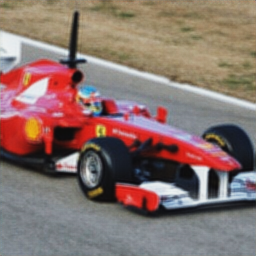

global_step= 1501  losses= 0.010913917  time=2.869016s
global_step= 1502  losses= 0.012337293  time=2.867908s
global_step= 1503  losses= 0.014421689  time=2.853465s
global_step= 1504  losses= 0.011440263  time=2.856506s
global_step= 1505  losses= 0.011196342  time=2.852194s
global_step= 1506  losses= 0.01269172  time=2.854464s
global_step= 1507  losses= 0.012426908  time=2.853415s
global_step= 1508  losses= 0.01115944  time=2.868116s
global_step= 1509  losses= 0.014101818  time=2.865529s
global_step= 1510  losses= 0.011638478  time=2.875721s
global_step= 1511  losses= 0.010602879  time=2.852175s
global_step= 1512  losses= 0.010514776  time=2.852414s
global_step= 1513  losses= 0.011211853  time=2.855471s
global_step= 1514  losses= 0.012783949  time=2.855176s
global_step= 1515  losses= 0.011661322  time=2.863058s
global_step= 1516  losses= 0.014025585  time=2.856339s
global_step= 1517  losses= 0.011375017  time=2.866273s
global_step= 1518  losses= 0.009391622  time=2.872168s
global_step=

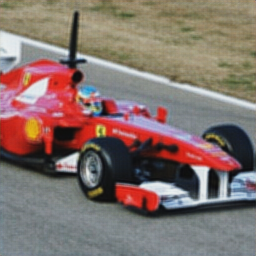

global_step= 1601  losses= 0.014058255  time=2.902436s
global_step= 1602  losses= 0.01075922  time=2.873035s
global_step= 1603  losses= 0.013186891  time=2.866813s
global_step= 1604  losses= 0.013692137  time=2.860275s
global_step= 1605  losses= 0.013410111  time=2.856334s
global_step= 1606  losses= 0.0102622565  time=2.861026s
global_step= 1607  losses= 0.01170171  time=2.864527s
global_step= 1608  losses= 0.011532008  time=2.869755s
global_step= 1609  losses= 0.014639705  time=2.853296s
global_step= 1610  losses= 0.012926332  time=2.884869s
global_step= 1611  losses= 0.012582975  time=2.851454s
global_step= 1612  losses= 0.012897921  time=2.850919s
global_step= 1613  losses= 0.013267812  time=2.859306s
global_step= 1614  losses= 0.010984355  time=2.858611s
global_step= 1615  losses= 0.016285831  time=2.869269s
global_step= 1616  losses= 0.010491609  time=2.853531s
global_step= 1617  losses= 0.009646427  time=2.852340s
global_step= 1618  losses= 0.011218074  time=2.858126s
global_step

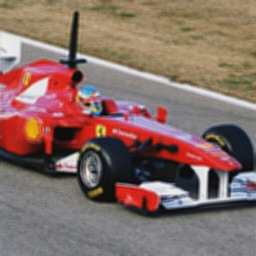

global_step= 1701  losses= 0.011945841  time=2.894502s
global_step= 1702  losses= 0.011121484  time=2.858810s
global_step= 1703  losses= 0.012714467  time=2.890412s
global_step= 1704  losses= 0.015827043  time=2.866050s
global_step= 1705  losses= 0.009535294  time=2.866505s
global_step= 1706  losses= 0.013281255  time=2.871665s
global_step= 1707  losses= 0.013239704  time=2.853195s
global_step= 1708  losses= 0.014891365  time=2.873198s
global_step= 1709  losses= 0.01110008  time=2.868789s
global_step= 1710  losses= 0.011844832  time=2.866607s
global_step= 1711  losses= 0.0121446075  time=2.863279s
global_step= 1712  losses= 0.013037592  time=2.865599s
global_step= 1713  losses= 0.013751391  time=2.870351s
global_step= 1714  losses= 0.010299638  time=2.849595s
global_step= 1715  losses= 0.010842953  time=2.869066s
global_step= 1716  losses= 0.010420889  time=2.873904s
global_step= 1717  losses= 0.013306455  time=2.883630s
global_step= 1718  losses= 0.014907133  time=2.837745s
global_ste

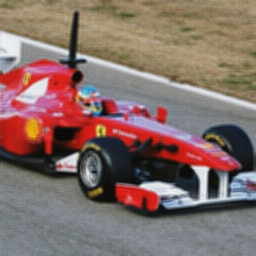

global_step= 1801  losses= 0.013168723  time=3.377769s
global_step= 1802  losses= 0.012431342  time=2.874441s
global_step= 1803  losses= 0.00940614  time=2.890008s
global_step= 1804  losses= 0.009382271  time=2.885104s
global_step= 1805  losses= 0.015415079  time=2.850795s
global_step= 1806  losses= 0.016018618  time=2.874119s
global_step= 1807  losses= 0.0121888155  time=2.852211s
global_step= 1808  losses= 0.011124314  time=2.877182s
global_step= 1809  losses= 0.01273398  time=2.895203s
global_step= 1810  losses= 0.01246336  time=2.863215s
global_step= 1811  losses= 0.013030399  time=2.869154s
global_step= 1812  losses= 0.013620538  time=2.876313s
global_step= 1813  losses= 0.011455112  time=2.860429s
global_step= 1814  losses= 0.013505455  time=2.897636s
global_step= 1815  losses= 0.009602495  time=2.874933s
global_step= 1816  losses= 0.0097496  time=2.895296s
global_step= 1817  losses= 0.009594488  time=2.884461s
global_step= 1818  losses= 0.011938938  time=2.880780s
global_step= 1

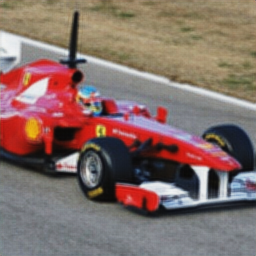

global_step= 1901  losses= 0.011865095  time=3.507974s
global_step= 1902  losses= 0.012522053  time=2.887367s
global_step= 1903  losses= 0.010141593  time=2.914912s
global_step= 1904  losses= 0.010057603  time=2.902751s
global_step= 1905  losses= 0.013947736  time=2.896022s
global_step= 1906  losses= 0.012027378  time=2.869983s
global_step= 1907  losses= 0.012120943  time=2.887540s
global_step= 1908  losses= 0.014895901  time=2.872754s
global_step= 1909  losses= 0.012099632  time=2.886436s
global_step= 1910  losses= 0.010925289  time=2.889933s
global_step= 1911  losses= 0.012565256  time=2.893775s
global_step= 1912  losses= 0.012115348  time=2.887002s
global_step= 1913  losses= 0.012763548  time=2.895622s
global_step= 1914  losses= 0.013044336  time=2.893588s
global_step= 1915  losses= 0.012538295  time=2.883436s
global_step= 1916  losses= 0.011345151  time=2.882357s
global_step= 1917  losses= 0.012115271  time=2.906664s
global_step= 1918  losses= 0.012834619  time=2.891156s
global_ste

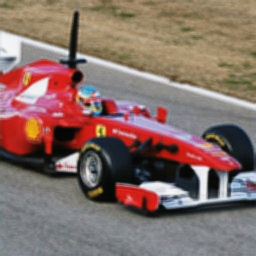

global_step= 2001  losses= 0.012341856  time=3.443227s
global_step= 2002  losses= 0.011316351  time=2.881773s
global_step= 2003  losses= 0.011469871  time=2.891004s
global_step= 2004  losses= 0.013352421  time=2.896320s
global_step= 2005  losses= 0.012468223  time=2.903082s
global_step= 2006  losses= 0.011465765  time=2.898167s
global_step= 2007  losses= 0.015642384  time=2.915774s
global_step= 2008  losses= 0.01041232  time=2.889287s
global_step= 2009  losses= 0.013370093  time=2.889261s
global_step= 2010  losses= 0.013239439  time=2.876504s
global_step= 2011  losses= 0.013975439  time=2.887908s
global_step= 2012  losses= 0.011227424  time=2.879242s
global_step= 2013  losses= 0.012560957  time=2.876820s
global_step= 2014  losses= 0.011137675  time=2.866425s
global_step= 2015  losses= 0.013426252  time=2.880548s
global_step= 2016  losses= 0.010722232  time=2.895679s
global_step= 2017  losses= 0.012174033  time=2.903263s
global_step= 2018  losses= 0.012220941  time=2.887552s
global_step

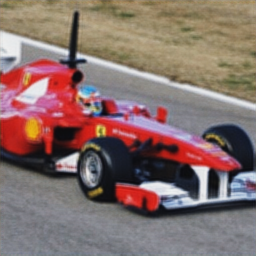

global_step= 2101  losses= 0.010073915  time=3.068527s
global_step= 2102  losses= 0.009984976  time=2.902768s
global_step= 2103  losses= 0.019060655  time=2.881356s
global_step= 2104  losses= 0.015040223  time=2.871570s
global_step= 2105  losses= 0.012821768  time=2.881574s
global_step= 2106  losses= 0.013850582  time=2.892955s
global_step= 2107  losses= 0.013614708  time=2.893494s
global_step= 2108  losses= 0.01074015  time=2.900796s
global_step= 2109  losses= 0.01222315  time=2.892036s
global_step= 2110  losses= 0.010596655  time=2.908406s
global_step= 2111  losses= 0.015021295  time=2.874910s
global_step= 2112  losses= 0.012144915  time=2.880555s
global_step= 2113  losses= 0.016041812  time=2.887660s
global_step= 2114  losses= 0.01406581  time=2.897243s
global_step= 2115  losses= 0.013987936  time=2.874341s
global_step= 2116  losses= 0.011426858  time=2.876522s
global_step= 2117  losses= 0.010297311  time=2.859535s
global_step= 2118  losses= 0.011263707  time=2.887417s
global_step= 

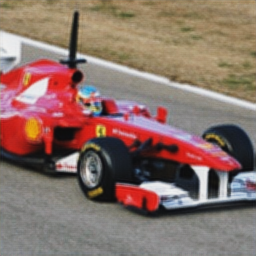

global_step= 2201  losses= 0.011439244  time=2.882734s
global_step= 2202  losses= 0.009192309  time=2.863148s
global_step= 2203  losses= 0.01182603  time=2.859642s
global_step= 2204  losses= 0.014119116  time=2.862882s
global_step= 2205  losses= 0.010586551  time=2.842148s
global_step= 2206  losses= 0.012893216  time=2.860068s
global_step= 2207  losses= 0.0115059195  time=2.854117s
global_step= 2208  losses= 0.011770725  time=2.855015s
global_step= 2209  losses= 0.013735077  time=2.856044s
global_step= 2210  losses= 0.013139102  time=2.829390s
global_step= 2211  losses= 0.013713792  time=2.845316s
global_step= 2212  losses= 0.010998449  time=2.862102s
global_step= 2213  losses= 0.009668748  time=2.849344s
global_step= 2214  losses= 0.0136311995  time=2.849596s
global_step= 2215  losses= 0.011973746  time=2.844898s
global_step= 2216  losses= 0.01312855  time=2.849048s
global_step= 2217  losses= 0.0101742055  time=2.844949s
global_step= 2218  losses= 0.013518003  time=2.843230s
global_st

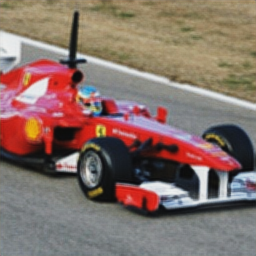

global_step= 2301  losses= 0.010829384  time=2.882031s
global_step= 2302  losses= 0.011482365  time=2.858068s
global_step= 2303  losses= 0.015413879  time=2.853316s
global_step= 2304  losses= 0.013754904  time=2.840082s
global_step= 2305  losses= 0.014501813  time=2.865813s
global_step= 2306  losses= 0.012965745  time=2.859496s
global_step= 2307  losses= 0.010291065  time=2.858634s
global_step= 2308  losses= 0.010966173  time=2.848352s
global_step= 2309  losses= 0.010928684  time=2.861918s
global_step= 2310  losses= 0.009391625  time=2.852168s
global_step= 2311  losses= 0.011831377  time=2.853081s
global_step= 2312  losses= 0.012962422  time=2.860019s
global_step= 2313  losses= 0.0135061145  time=2.839383s
global_step= 2314  losses= 0.011968113  time=2.849329s
global_step= 2315  losses= 0.012158711  time=2.848964s
global_step= 2316  losses= 0.01079939  time=2.860430s
global_step= 2317  losses= 0.0107894195  time=2.869481s
global_step= 2318  losses= 0.0116998525  time=2.831908s
global_s

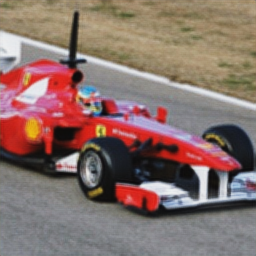

global_step= 2401  losses= 0.014337617  time=3.276778s
global_step= 2402  losses= 0.01120348  time=2.850317s
global_step= 2403  losses= 0.012841391  time=2.860648s
global_step= 2404  losses= 0.014230892  time=2.828139s
global_step= 2405  losses= 0.010061924  time=2.830259s
global_step= 2406  losses= 0.010607168  time=2.840425s
global_step= 2407  losses= 0.011173837  time=2.848716s
global_step= 2408  losses= 0.009913251  time=2.837824s
global_step= 2409  losses= 0.010098593  time=2.837095s
global_step= 2410  losses= 0.011670954  time=2.842163s
global_step= 2411  losses= 0.012336411  time=2.865622s
global_step= 2412  losses= 0.012122189  time=2.848689s
global_step= 2413  losses= 0.013087255  time=2.852598s
global_step= 2414  losses= 0.010463909  time=2.829536s
global_step= 2415  losses= 0.015663192  time=2.855003s
global_step= 2416  losses= 0.014737491  time=2.856586s
global_step= 2417  losses= 0.012151767  time=2.847826s
global_step= 2418  losses= 0.0107387975  time=2.849094s
global_ste

In [0]:
from google.colab.patches import cv2_imshow 
from google.colab import files
import os


batch_size = 32
learning_rate = 0.001
train_steps = 20000
img_set = Image_set()


model_dir = 'run_model/'
#model_dir = './'
log_dir ='run_log/'
test_dir = 'test_img/'
saver = tf.train.Saver()


with tf.name_scope('train_op'):
    train_op = tf.train.AdamOptimizer(learning_rate).minimize(loss,global_step=global_step)
init_op = tf.global_variables_initializer()

with tf.Session() as sess:
    merged = tf.summary.merge_all()
    writer = tf.summary.FileWriter(log_dir,sess.graph)
    sess.run(init_op)
    ckpt = tf.train.get_checkpoint_state(model_dir)
    if ckpt and ckpt.model_checkpoint_path:
        ckpt_name = os.path.basename(ckpt.model_checkpoint_path)
        saver.restore(sess, os.path.join(model_dir, ckpt_name))
        
    test  = True    
    for step in range(train_steps):
    #for step in range(4):
        if not test:
            start_time = time.time()
            batch_squared_img,batch_blured_img = img_set.next_batch(batch_size)
            global_step_val,losses,losses_merged,_= sess.run([global_step,loss,merged,train_op],
                                                          feed_dict={x_image:batch_blured_img , y_image:batch_squared_img})
        
            use_time = time.time()-start_time
            print("global_step=",global_step_val," losses=",losses," time=%02fs"%use_time)
        
            if global_step_val%100 ==0:
                writer.add_summary(losses_merged,global_step_val)
                saver.save(sess,os.path.join(model_dir,'ckp-%06d' %global_step_val))
                print('model saved to ckp-%06d' %global_step_val)
                test = True
            """    
            if global_step_val%2000 ==0:
                os.chdir(model_dir)
                files.download('ckp-%06d.data-00000-of-00001'%global_step_val)
                files.download('ckp-%06d.index'%global_step_val)
                files.download('ckp-%06d.meta'%global_step_val)
                os.chdir('/content')os.chdir(model_dir)"""
            
        else:    #每20步测试一下图片生成情况
            batch_squared_img,batch_blured_img = img_set.next_batch(1)
            global_step_val,generated_imgs = sess.run([global_step,y_image_predict],
                                                        feed_dict={x_image:batch_blured_img , y_image:batch_squared_img})
            #不训练执行train_op的时候，global_step_val不会+1
            img = generated_imgs[-1]
            img = (img+1)*127.5
            img = np.array(img,dtype = np.uint8)
            out_put_path = os.path.join(test_dir,"%06d.jpg" %global_step_val)
            cv2.imwrite(out_put_path,img)
            cv2_imshow(img)
            cv2.waitKey()
            test = False
            
            
        

            
            

In [0]:

"""import os
os.chdir(model_dir)
files.download('ckp-%06d.data-00000-of-00001'%1000)
files.download('ckp-%06d.index'%1000)
files.download('ckp-%06d.meta'%1000)
files.download('checkpoint')"""

In [0]:
ls run_model